In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Coffee_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [4]:
df.drop(columns=['Time','Weekdaysort','Monthsort'], axis=1, inplace=True)

In [5]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Date
0,10,card,38.7,Latte,Morning,Fri,Mar,2024-03-01
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01
3,13,card,28.9,Americano,Afternoon,Fri,Mar,2024-03-01
4,13,card,38.7,Latte,Afternoon,Fri,Mar,2024-03-01


In [6]:
# Convert Date column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

# Extract Day, Month, Year into new columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [7]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Date,Day,Month,Year
0,10,card,38.70,Latte,Morning,Fri,Mar,2024-03-01,1,3,2024
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,1,3,2024
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,1,3,2024
3,13,card,28.90,Americano,Afternoon,Fri,Mar,2024-03-01,1,3,2024
4,13,card,38.70,Latte,Afternoon,Fri,Mar,2024-03-01,1,3,2024
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,2025-03-23,23,3,2025
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,2025-03-23,23,3,2025
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,2025-03-23,23,3,2025
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,2025-03-23,23,3,2025


In [8]:
# Dropping 'Date' column

df.drop(columns='Date', axis=1)
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Date,Day,Month,Year
0,10,card,38.7,Latte,Morning,Fri,Mar,2024-03-01,1,3,2024
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,1,3,2024
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,1,3,2024
3,13,card,28.9,Americano,Afternoon,Fri,Mar,2024-03-01,1,3,2024
4,13,card,38.7,Latte,Afternoon,Fri,Mar,2024-03-01,1,3,2024


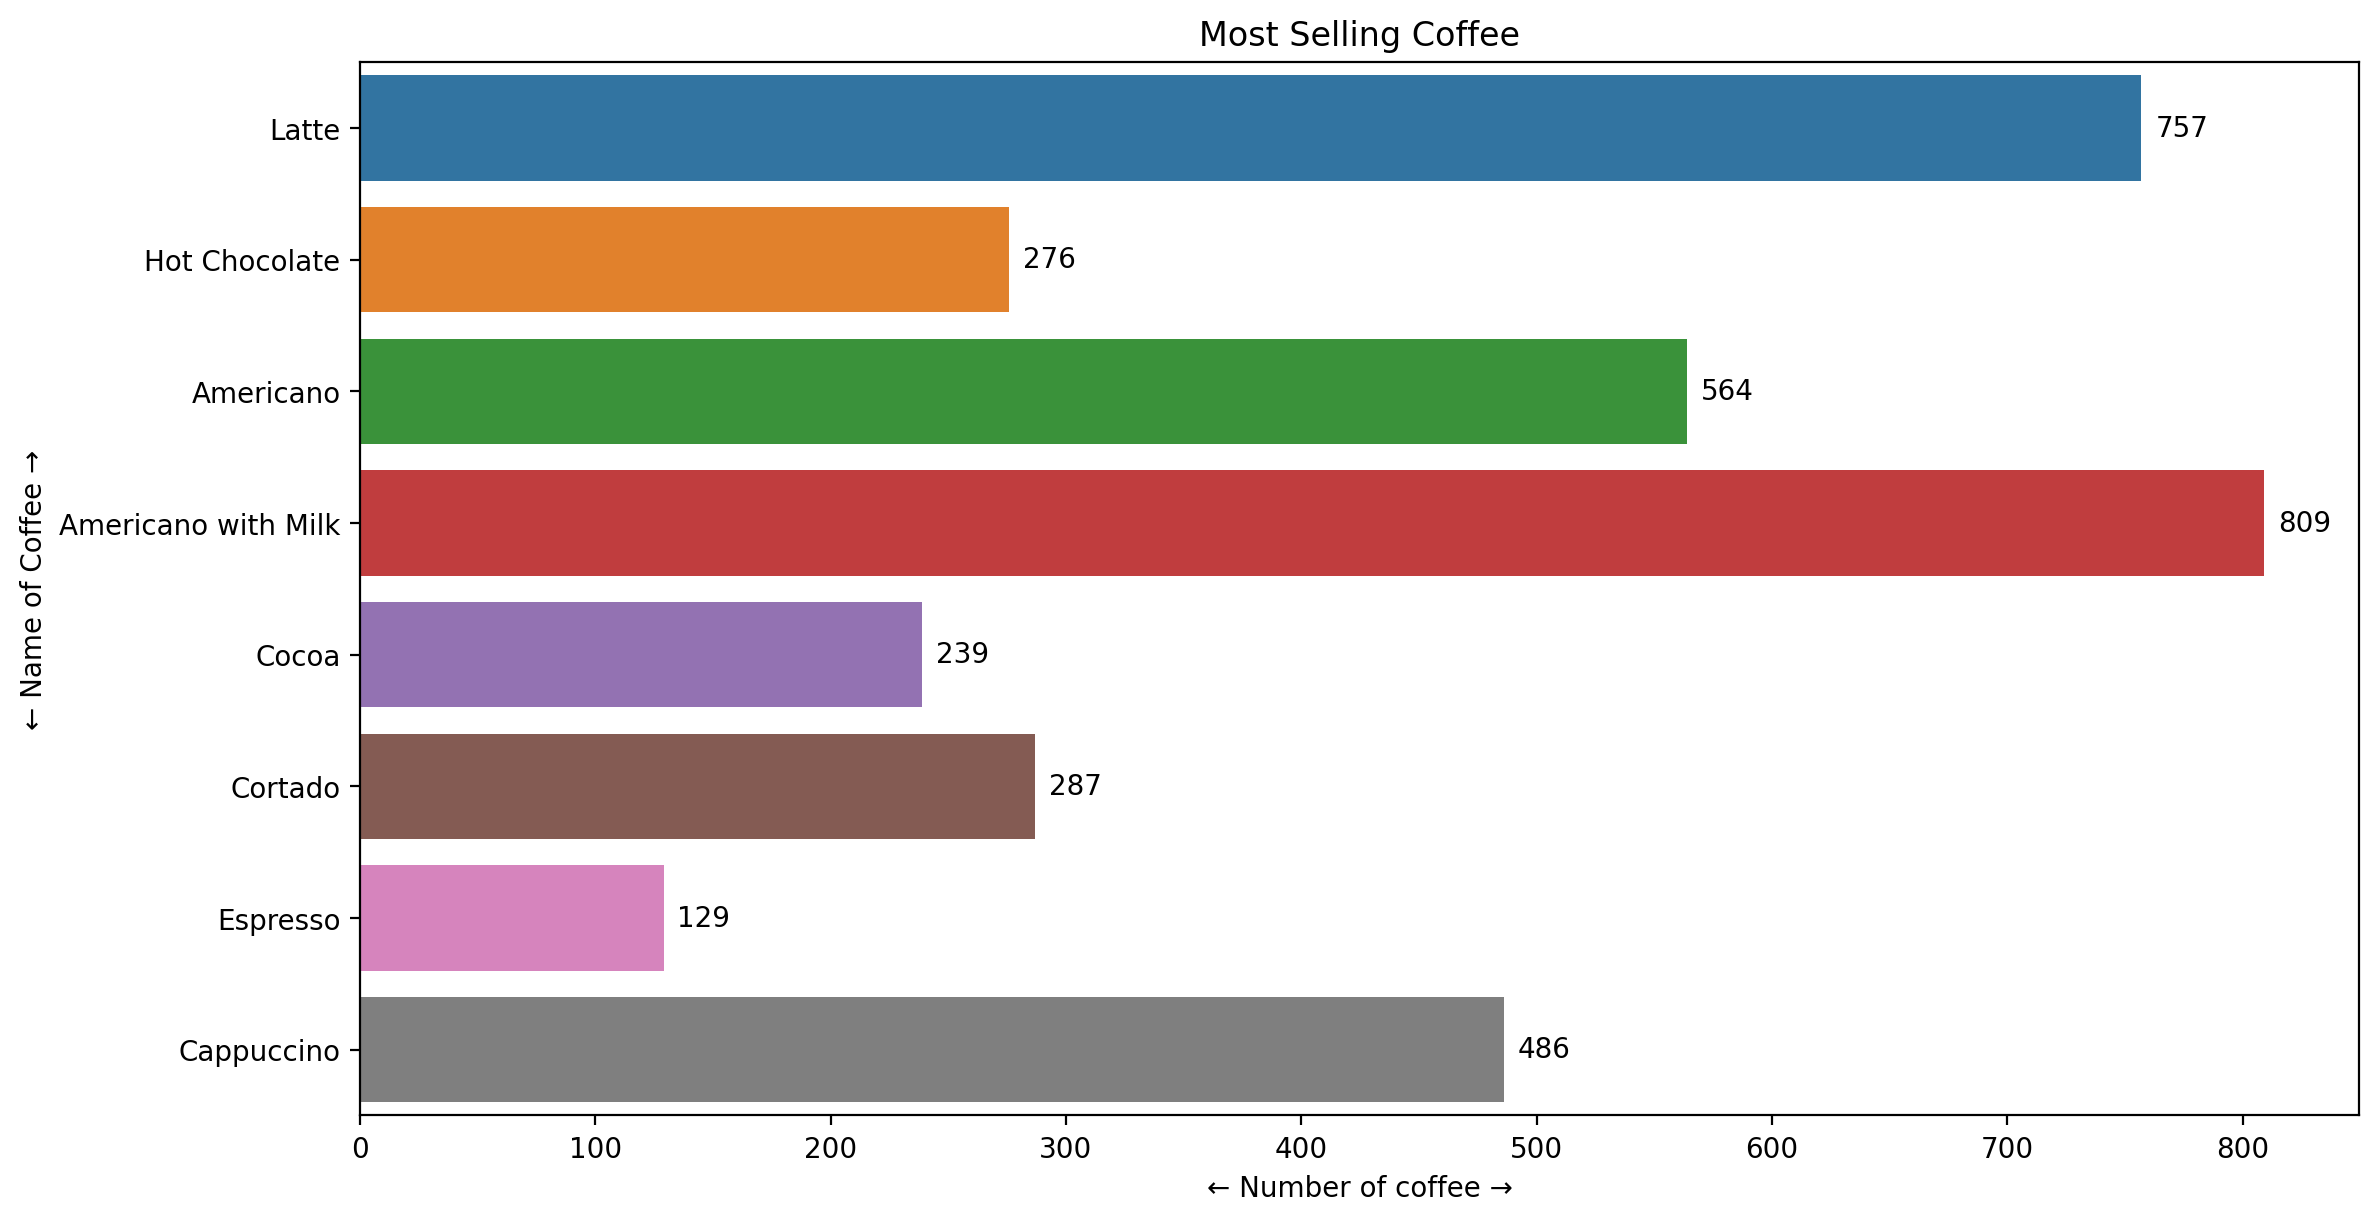

In [9]:
plt.figure(figsize=(12, 6), dpi=200)
ax = sns.countplot(y='coffee_name', data=df, hue="coffee_name")
# Iterate over the bars (patches) and add text labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.title("Most Selling Coffee")
plt.xlabel("← Number of coffee →")
plt.ylabel("← Name of Coffee →")
plt.show()

In [10]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

In [65]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Date,Day,Month,Year,is_weekend,Year_Month
0,10,card,38.7,Latte,Morning,Fri,Mar,2024-03-01,1,3,2024,False,Mar 2024
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,1,3,2024,False,Mar 2024
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,1,3,2024,False,Mar 2024
3,13,card,28.9,Americano,Afternoon,Fri,Mar,2024-03-01,1,3,2024,False,Mar 2024
4,13,card,38.7,Latte,Afternoon,Fri,Mar,2024-03-01,1,3,2024,False,Mar 2024


In [68]:
# df.to_csv("Output.csv", index=False)


# Questions 

## 🛍️ Sales Performance  
#### 1. What is the `total revenue` from all sales?  

In [48]:
total_revenue = df['money'].sum()
print(f"Total Revenue from all sales is : {np.round(total_revenue,2)}")

Total Revenue from all sales is : 112245.58


 
#### 2. What is the `average revenue per transaction`? 

In [49]:
avg_revnue = df['money'].mean()
print(f"Average revenue per transaction is : {np.round(avg_revnue,2)}")

Average revenue per transaction is : 31.65


#### 3. Which are the `top 5 best-selling coffee types` (by revenue and quantity)?

In [50]:
# By quantity

by_quantity = df['coffee_name'].value_counts().head()
print(f"Top 5 most selling coffee names : \n\n{by_quantity}")

Top 5 most selling coffee names : 

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Name: count, dtype: int64


In [51]:
# By revenue

by_revenue = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head()
print(f"Top 5 most selling coffee names : \n\n{by_revenue}")

Top 5 most selling coffee names : 

coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Name: money, dtype: float64


#### 4. Which are the `least-selling coffee types`? 

In [52]:
least_selling = df['coffee_name'].value_counts(ascending=True).head()
print(f"Least selling coffee names : \n\n{least_selling}")

Least selling coffee names : 

coffee_name
Espresso         129
Cocoa            239
Hot Chocolate    276
Cortado          287
Cappuccino       486
Name: count, dtype: int64


#### 5. Which `month contributes the most revenue` overall? 

In [53]:
most_revenue_by_month = df.groupby('Month_name')['money'].sum().sort_values(ascending=False).head()
print(f"Most revenue based on Months : \n\n{most_revenue_by_month}")

Most revenue based on Months : 

Month_name
Mar    15891.64
Oct    13891.16
Feb    13215.48
Sep     9988.64
Nov     8590.54
Name: money, dtype: float64


## ⏰ Time-Based Analysis
#### 6. How does `sales vary by hour of the day`? 

In [54]:
sales_by_hour = df.groupby('hour_of_day')['money'].sum().sort_values(ascending=False)
print(f"Sales based on hour of the day : \n\n{sales_by_hour.head()}")

Sales based on hour of the day : 

hour_of_day
10    10198.52
16     9031.84
11     8453.10
19     7751.96
17     7659.76
Name: money, dtype: float64


#### 7. Which `time of day (Morning, Afternoon, Night)` has the highest sales?

In [55]:
highest_sales_on_time = df.groupby('Time_of_Day')['money'].sum().sort_values(ascending=False)
print(f"Sales based on time of day : \n\n{highest_sales_on_time.head()}")

Sales based on time of day : 

Time_of_Day
Night        38186.34
Afternoon    38130.04
Morning      35929.20
Name: money, dtype: float64


#### 8. Which `day of the week` records the highest and lowest sales?

In [56]:
sales_of_week = df.groupby('Weekday')['money'].sum().sort_values(ascending=False)
print(f"Sales of the week : \n\n{sales_of_week}")

highest_sales_of_week = sales_of_week.max()
print(f"\nHighest sale of the week : (Tuesday, {highest_sales_of_week})")

lowest_sales_of_week = sales_of_week.min()
print(f"Lowest sale of week : (Sunday, {lowest_sales_of_week})")

Sales of the week : 

Weekday
Tue    18168.38
Mon    17363.10
Fri    16802.66
Thu    16091.40
Wed    15750.46
Sat    14733.52
Sun    13336.06
Name: money, dtype: float64

Highest sale of the week : (Tuesday, 18168.38)
Lowest sale of week : (Sunday, 13336.06)


#### 9. Do `sales differ significantly between weekdays and weekends`?  

In [57]:
df['is_weekend'] = df['Weekday'].isin(['Sat','Sun'])
weekend_sales = df.groupby('is_weekend')['money'].sum()
print(f"Do sales differ significantly between weekdays and weekends : \n\n{weekend_sales}")
print(f"\nYes, The sales on weekends is lower than weekdays")

Do sales differ significantly between weekdays and weekends : 

is_weekend
False    84176.00
True     28069.58
Name: money, dtype: float64

Yes, The sales on weekends is lower than weekdays


#### 10. How does the `sales trend look across months`?

In [58]:
trends_look = df.groupby(['Year','Month_name'])['money'].sum().sort_values(ascending=False)
print(f"Sales trend across months : \n\n{trends_look}")

Sales trend across months : 

Year  Month_name
2024  Oct           13891.16
2025  Feb           13215.48
2024  Sep            9988.64
2025  Mar            9986.44
2024  Nov            8590.54
      Dec            8237.74
      May            8164.42
      Jun            7617.76
      Aug            7613.84
      Jul            6915.94
2025  Jan            6398.86
2024  Mar            5905.20
      Apr            5719.56
Name: money, dtype: float64


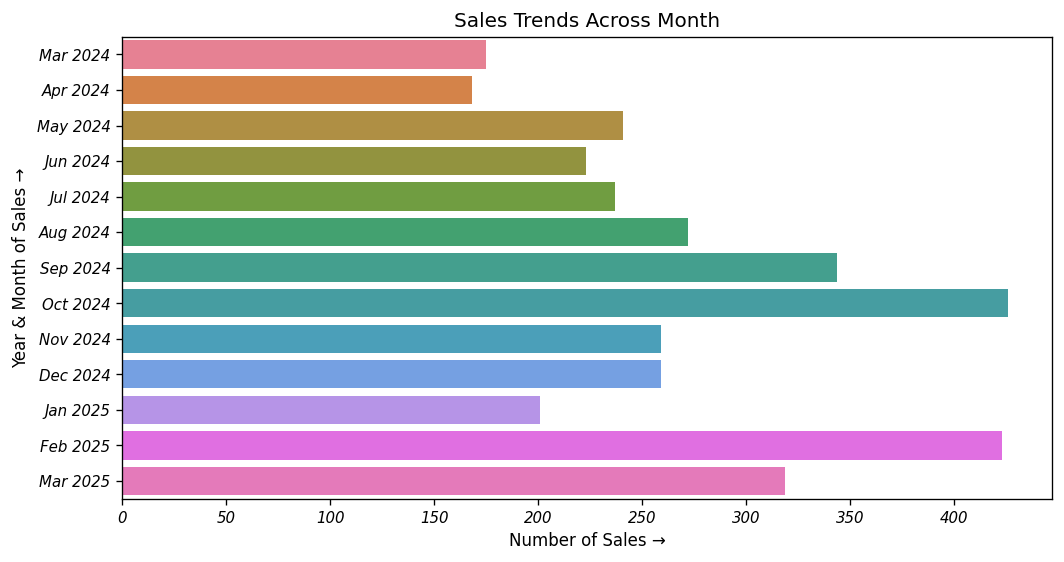

In [59]:
df['Year_Month'] = df['Month_name'] + " " + df['Year'].astype(str)
plt.figure(figsize=(10,5), dpi=120)
sns.countplot(data=df, y='Year_Month', palette='husl')
plt.title("Sales Trends Across Month")
plt.xlabel("Number of Sales →", fontsize=10)
plt.ylabel("Year & Month of Sales →", fontsize=10)
plt.yticks(fontsize=9, fontstyle='italic')
plt.xticks(fontsize=9, fontstyle='italic')
plt.show()

#### 11. Are there any `patterns in sales by hour vs weekday` (heatmap)?  

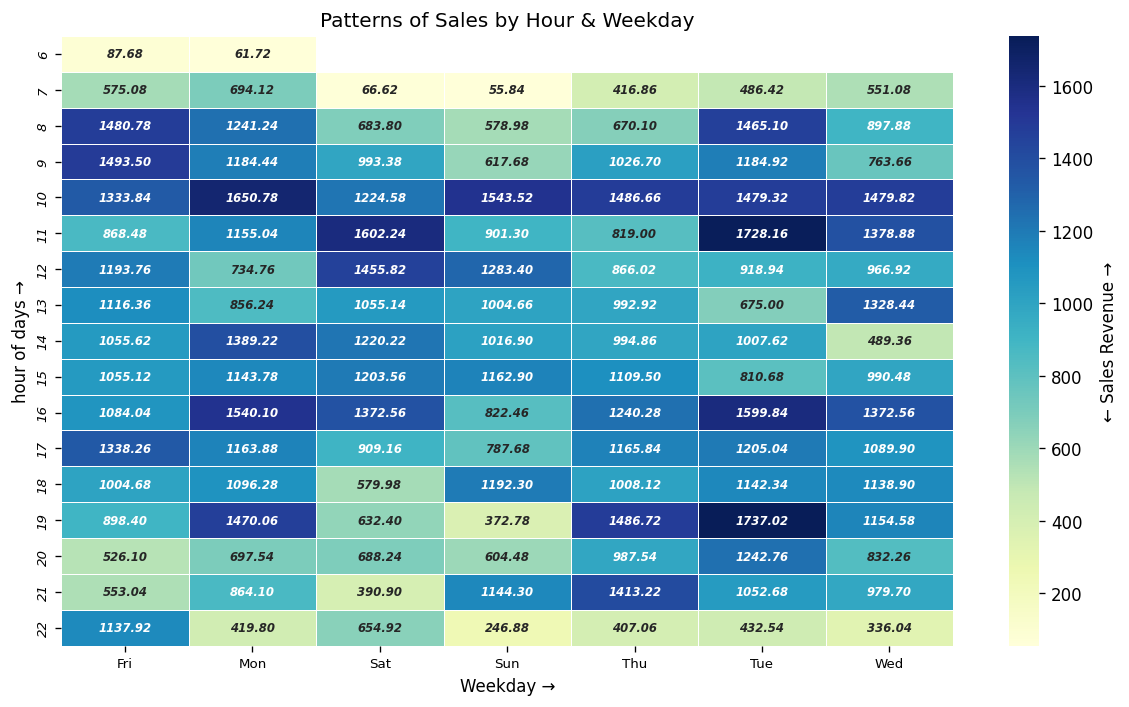

In [60]:
patterns_sales = df.pivot_table(values='money', index='hour_of_day', columns='Weekday', aggfunc='sum')
plt.figure(figsize=(10,6), dpi=120)
sns.heatmap(patterns_sales, cmap='YlGnBu', annot=True, fmt=".2f", annot_kws={"size": 7, "style" :"italic", "weight": "semibold"}, 
            linewidths=0.5, cbar_kws={'label' : '← Sales Revenue →'})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8, fontstyle="italic")
plt.xlabel("Weekday →")
plt.ylabel("hour of days →")
plt.title("Patterns of Sales by Hour & Weekday")
plt.tight_layout()
plt.show ()

## 💳 Payment Insights  
#### 12. What is the `distribution of sales by payment method` (cash vs card)?  
#### 13. Do customers `spend more on card transactions than cash`? 

In [61]:
payment_via = df.groupby('cash_type')['money'].sum()
print(f"Distribution of sales by payment method is : \n\n{payment_via}")
print(f"\nYes, All transaction are only done via card and not any transaction is found via cash")

Distribution of sales by payment method is : 

cash_type
card    112245.58
Name: money, dtype: float64

Yes, All transaction are only done via card and not any transaction is found via cash


## ☕ Product Insights  

#### 14. What is the `price distribution of coffee products`? 

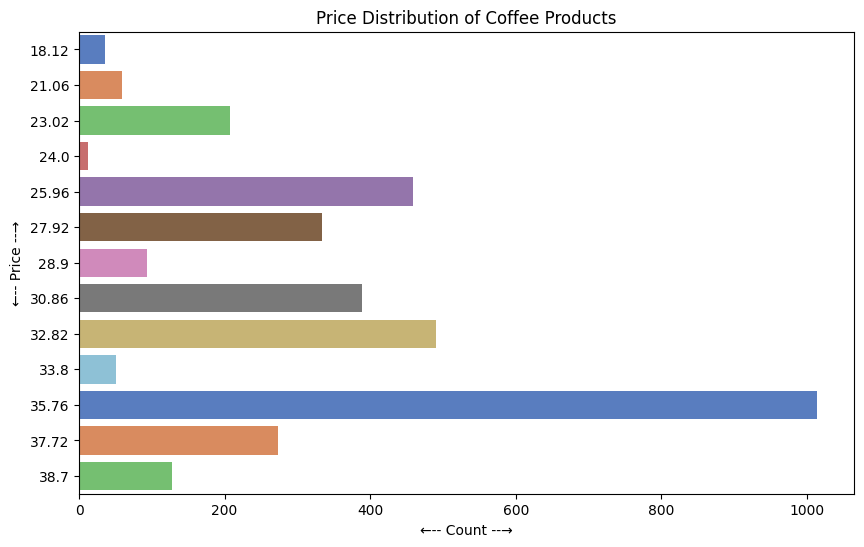

In [62]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(data=df, y='money', palette='muted')
plt.title("Price Distribution of Coffee Products")
plt.ylabel("←-- Price --→") 
plt.xlabel("←-- Count --→") 
plt.show()

#### 15. How do `transaction values vary across coffee types`?

In [63]:
money_across_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print(f"Transaction values across coffee is : \n\n{money_across_coffee}")

Transaction values across coffee is : 

coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64


#### 16. Which products follow the `Pareto principle (80% of revenue from 20% products)`? 

In [64]:
# Total sales of coffee
coffee_revenue = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

# Calculating the percentage of 'coffee_revenue'
coffee_revenue_percent = coffee_revenue.cumsum()/coffee_revenue.sum()*100

# Calculating 'Pareto principle'
pareto_products = coffee_revenue_percent[coffee_revenue_percent <= 80]
print(f"Lists of Pareto ppinciple (80% of revenue from 20% products) : \n\n{np.round(pareto_products,2)}")

Lists of Pareto ppinciple (80% of revenue from 20% products) : 

coffee_name
Latte                  23.94
Americano with Milk    45.99
Cappuccino             61.53
Americano              74.58
Name: money, dtype: float64


## 🛠️ Skills to Apply  
- **NumPy** → Calculations (`sum`, `mean`, `median`, `percentiles`).  
- **Pandas** → Grouping, aggregation, filtering (`groupby`, `pivot_table`).  
- **Matplotlib** → `line plots`, `bar charts`, `pie charts`.  
- **Seaborn** → `heatmaps`, `boxplots`, `violin plots`, `countplots`.  



## 🎯 Goal  
By exploring these questions, you will:  
- Understand overall `sales performance`.  
- Identify `best-selling and least-selling products`.  
- Discover `time-based sales patterns`.  
- Compare `payment preferences`.  
- Provide `business insights` for decision-making.  